<a href="https://colab.research.google.com/github/BetoACE/Python.-De-cero-a-ML/blob/main/Regresi%C3%B3n_Lineal_M%C3%BAltiple_ML_UNAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión Lineal Múltiple


Cómo importar las librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importar el data set


In [ ]:
dataset = pd.read_csv('/content/50_Startups.csv')

# dataset.info()
dataset.head(10)
# dataset.value_counts(["State"])

#Asignamos las columnas/características a variaables X y Y

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# print(type(y))

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Codificar datos categóricos

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = make_column_transformer((OneHotEncoder(), [3]), remainder = "passthrough")
X = onehotencoder.fit_transform(X)

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

Dividir el data set en conjunto de entrenamiento y conjunto de testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Escalado de variables


In [ ]:
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

Ajustar el modelo de Regresión lineal múltiple con el conjunto de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Predicción de los resultados en el conjunto de testing


In [ ]:
y_pred = regression.predict(X_test)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94] [103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]


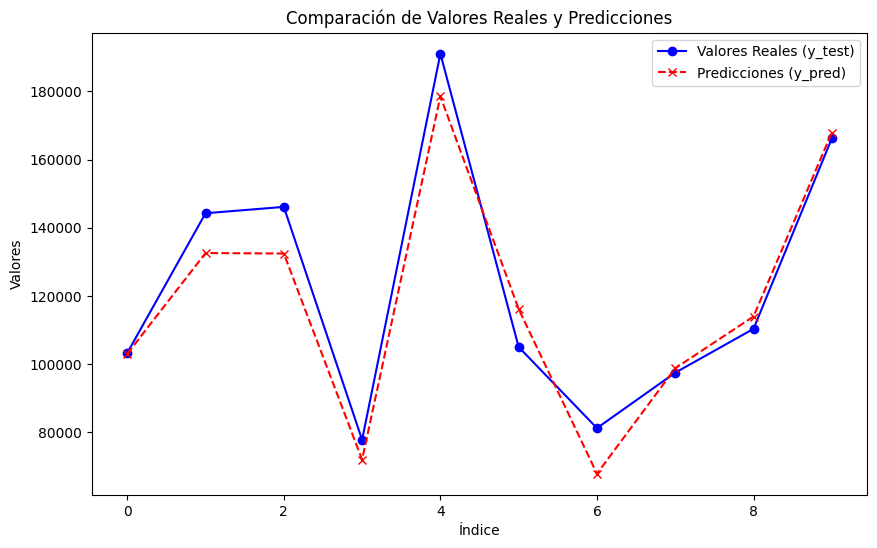

In [ ]:
print(y_test,y_pred)


import matplotlib.pyplot as plt

# Supongamos que y_test y y_pred son arrays de numpy o listas
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores Reales (y_test)', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicciones (y_pred)', color='red', linestyle='--', marker='x')

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz cuadrada del MSE
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


Error Cuadrático Medio (MSE): 83502864.03
Error Absoluto Medio (MAE): 7514.29
Raíz del Error Cuadrático Medio (RMSE): 9137.99
Coeficiente de Determinación (R^2): 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
